In [1]:
using Pkg

In [2]:
Pkg.add("CSV");
Pkg.add("BenchmarkTools");
Pkg.add("DataFrames");
Pkg.add("DelimitedFiles");
Pkg.add("LinearAlgebra");

    Updating registry at `/srv/julia/pkg/registries/General.toml`
   Resolving package versions...
┌ Warning: The active manifest file at `/home/jovyan/Manifest.toml` has an old format that is being maintained.
│ To update to the new format run `Pkg.upgrade_manifest()` which will upgrade the format without re-resolving.
└ @ Pkg.Types /buildworker/worker/package_linux64/build/usr/share/julia/stdlib/v1.7/Pkg/src/manifest.jl:287
  No Changes to `~/Project.toml`
  No Changes to `~/Manifest.toml`
┌ Warning: The active manifest file is an older format with no julia version entry. Dependencies may have been resolved with a different julia version.
└ @ nothing /home/jovyan/Manifest.toml:0
   Resolving package versions...
  No Changes to `~/Project.toml`
  No Changes to `~/Manifest.toml`
   Resolving package versions...
  No Changes to `~/Project.toml`
  No Changes to `~/Manifest.toml`
   Resolving package versions...
  No Changes to `~/Project.toml`
  No Changes to `~/Manifest.toml`
   Resolvi

In [3]:
using CSV
using BenchmarkTools
using DataFrames
using DelimitedFiles
using LinearAlgebra

In [4]:
Pkg.add("Plots");
using Plots

   Resolving package versions...
  No Changes to `~/Project.toml`
  No Changes to `~/Manifest.toml`


In [5]:
;head "Mall_Customers.csv"

CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40
6,Female,22,17,76
7,Female,35,18,6
8,Female,23,18,94
9,Male,64,19,3


In [9]:
P2=CSV.read("Mall_Customers.csv",DataFrame);

In [10]:
x7=[[P2[i,4],P2[i,5]] for i=1:length(P2[:,2])];

Kaynak: https://docs.julialang.org/en/v1/manual/arrays/


Verileri "kmeanss" Fonksiyonunda Kullanabilecek Tipe Dönüştürmenin Alternatif Yolu:


Pkg.add("CalculusWithJulia")

using CalculusWithJulia

x8=unzip(P2[:,4],P2[:,5])

Kaynak: https://docs.juliahub.com/CalculusWithJulia/AZHbv/0.0.5/differentiable_vector_calculus/vectors.html

ELBOW YÖNTEMİ İLE CLUSTERING

In [6]:
 function kmeanss(x,k)
       maxiters=500; tol=1e-10;
       N=length(x)
       n=length(x[1])
       distances=zeros(N)
       reps=[zeros(n) for j=1:k]
       wcss=[]
       assignment=[rand(1:k) for i in 1:N]
       Jprevious=Inf
       for iter=1:maxiters

           for j=1:k
               group=[i for i=1:N if assignment[i]==j]
               reps[j]=sum(x[group])/length(group);
           end;
           for i=1:N
               (distances[i],assignment[i])=findmin([norm(x[i]-reps[j]) for j=1:k])
           end;
           J=norm(distances)^2/N
        
           wcss=append!(wcss,[J])
           
           #println("Iteration ",iter,": Jclust = ",J,".")
           if iter>1 && abs(J-Jprevious) < tol*J
               return assignment,reps,wcss
           end
           Jprevious=J
       end
end

kmeanss (generic function with 1 method)

Kaynak:
Stephen Boyd and Lieven Vandenbergh, Introduction to Applied Linear Algebra Vectors, Matrices, and Least Squares -
Julia Language Companion, 32-33

Not: wcss matrisi elbow metdonda uygulayabilmek için fonksiyona eklenmiştir.

ELBOW METODU

In [11]:
elbow=[]
for i=1:10
    assignment, reps, wcss=kmeanss(x7,i)
    elbow=append!(elbow,wcss[end])
end
elbow

10-element Vector{Any}:
 1349.9064
  916.2893077230891
  531.741865310556
  368.3989451974417
  222.24227723966854
  187.2799227758014
  169.31010139760718
  150.28322795341913
  145.000990163251
  166.71031191605417

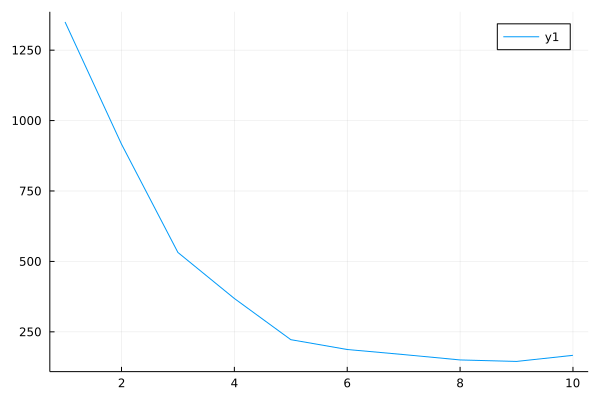

In [12]:
plot(range(1,10),elbow)

In [15]:
assignment, reps = kmeanss(x7,5);

Elbow metodu sonucu küme sayısı (k) 5 seçilmiştir.

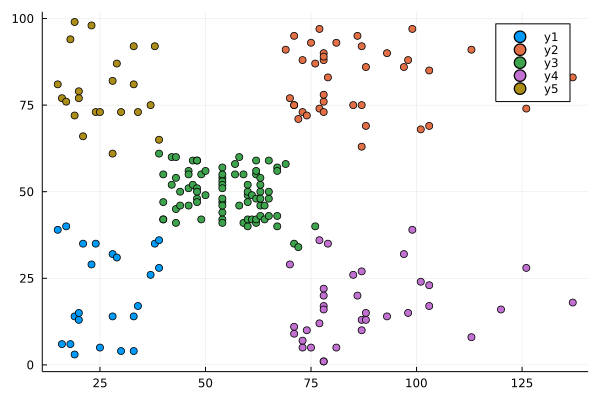

In [17]:
k=5;
grps = [[x7[i] for i=1:length(P2[:,2]) if assignment[i] == j] for j=1:k]
scatter([c[1] for c in grps[1]], [c[2] for c in grps[1]])
scatter!([c[1] for c in grps[2]], [c[2] for c in grps[2]])
scatter!([c[1] for c in grps[3]], [c[2] for c in grps[3]])
scatter!([c[1] for c in grps[4]], [c[2] for c in grps[4]])
scatter!([c[1] for c in grps[5]], [c[2] for c in grps[5]])